In [1]:
import pandas as pd

In [2]:
leads=pd.read_csv("D:/Datasets/Leads.csv")

In [3]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Data Cleaning

In [4]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [5]:
leads.shape

(9240, 37)

In [6]:
for col in leads.columns:
    if leads[col].isnull().sum()>3000:
        leads.drop(col,axis=1,inplace=True)

In [7]:
leads.shape

(9240, 31)

In [8]:
leads.isna().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [9]:
leads.drop(["City"],axis=1,inplace=True)

In [10]:
leads.drop("Country",axis=1,inplace=True)

In [11]:
round(leads.isna().sum()/leads.shape[0]*100)


Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article                                 0.0
X Education Forums          

In [12]:
leads["Newspaper"].astype("category").value_counts()

No     9239
Yes       1
Name: Newspaper, dtype: int64

In [13]:
for column in leads:
    print(leads[column].astype("category").value_counts())
    print("----------------------------------------------------------------")
    
    

fffb0e5e-9f92-4017-9f42-781a69da4154    1
56453aec-3f7b-4f30-870c-8f966d393100    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
                                       ..
aa4180a5-84f1-4e67-8d90-0c8403070a59    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: Lead Number, Length: 9240, dtype: int64
----------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype

In [14]:
leads["Lead Profile"].astype("category").value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [15]:
leads["Specialization"].astype("category").value_counts()


Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [16]:
leads["How did you hear about X Education"].astype("category").value_counts()


Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [17]:
leads.drop(["Lead Profile","How did you hear about X Education"],axis=1,inplace=True)

In [18]:
leads.drop(["Do Not Call","Search","Magazine","Newspaper Article","X Education Forums",
           "Newspaper","Digital Advertisement","Through Recommendations",
            "Receive More Updates About Our Courses","Update me on Supply Chain Content",
           "Get updates on DM Content","I agree to pay the amount through cheque"],axis=1,inplace=True)

In [19]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
leads.drop("What matters most to you in choosing a course",axis=1,inplace=True)

In [21]:
leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [22]:
leads.shape

(9240, 14)

In [23]:
leads=leads[~pd.isnull(leads["What is your current occupation"])]

In [24]:
leads.isna().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [25]:
leads=leads[~pd.isnull(leads["TotalVisits"])]

In [26]:
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                               29
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [27]:
leads=leads[~pd.isnull(leads["Lead Source"])]

In [28]:
leads.isna().sum()

Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
Specialization                            18
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [29]:
leads=leads[~pd.isnull(leads["Specialization"])]

In [30]:
leads.isna().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [31]:
leads.shape[0]

6373

In [32]:
leads.shape[0]/9240

0.6897186147186147

In [33]:
leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [34]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [35]:
leads.drop(["Prospect ID","Lead Number"],axis=1,inplace=True)

In [36]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [37]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [38]:
temp=leads.loc[:,leads.dtypes=="object"]

In [39]:
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [40]:
dummy=pd.get_dummies(leads[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']],drop_first=True)

In [41]:
dummy

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9234,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
9235,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9236,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
9237,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
leads=pd.concat([leads ,dummy],axis=1)


In [43]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,...,1,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,...,1,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,...,0,0,0,1,0,0,0,0,0,0
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,...,0,0,0,1,0,0,0,0,0,0


In [44]:
leads=leads.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [45]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [46]:
(leads.dtypes=="object").sum()

0

In [47]:
X=leads.drop(["Converted"],axis=1)

In [48]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [49]:
X.columns

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing',
       'Lead Source_testone', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olar

In [50]:
y=leads["Converted"]

In [51]:
leads["Converted"].value_counts()

0    3308
1    3065
Name: Converted, dtype: int64

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100,stratify=y)

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler=MinMaxScaler()

In [56]:
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits',
                                                                                                              'Total Time Spent on Website', 'Page Views Per Visit']])

<ipython-input-56-0aacd237fc70>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.fit_transform(X_train[['TotalVisits',
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [57]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
9192,0.163636,0.126320,0.054545,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3516,0.090909,0.046655,0.045455,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1888,0.109091,0.135123,0.109091,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
90,0.054545,0.094190,0.054545,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1327,0.036364,0.031250,0.036364,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg=LogisticRegression()

In [60]:
from sklearn.feature_selection import RFE

In [61]:
rfe=RFE(logreg,15)

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [62]:
rfe=rfe.fit(X_train,y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [63]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 4),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 38),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 15),
 ('Lead Source_Pay per Click Ads', False, 27),
 ('Lead Source_Press_Release', False, 51),
 ('Lead Source_Reference', False, 7),
 ('Lead Source_Referral Sites', False, 16),
 ('Lead Source_Social Media', False, 25),
 ('Lead Source_WeLearn', False, 33),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 46),
 ('Lead Source_testone', False, 26),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 19),
 ('Last Activity_Email Bounced', False, 13),
 ('Last Activity_Email Link C

In [64]:
col=X_train.columns[rfe.support_]

In [65]:
X_train=X_train[col]

In [66]:
import statsmodels.api as sm

In [67]:
X_train_sm=sm.add_constant(X_train)

In [68]:
logm2=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial())

In [69]:
res=logm2.fit()

In [70]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2036.4
Date:                Sun, 01 Nov 2020   Deviance:                       4072.9
Time:                        16:44:28   Pearson chi2:                 4.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0458      0.159     -6.595      0.000      -1.357      -0.735
TotalVisits                                              2.3132      0.655      3.534      0.000       1.030       3.596
Total Time Spent on Website                              4.2717      0.187     22.901      0.000       3.906       4.637
Lead Origin_Landing Page Submission                     -0.9801      0.137     -7.164      0.000      -1.248      -0.712
Lead Origin_Lead Add Form                                3.0699      0.239     12.844      0.000       2.601       3.538
Lead Source_Olark Chat                                   1.2830      0.147      8.747      0.000       0.996       1.570
Lead Source_Welingak Website                             3.2479      1.032      3.147      0.002       1.225       5.271
Do Not Email_Yes                                        -1.2394      0.192     -6.442      0.000      -1.616      -0.862
Last Activity_Had a Phone Conversation                   1.9501      0.912      2.139      0.032       0.163       3.737
Last Activity_SMS Sent                                   1.0618      0.085     12.486      0.000       0.895       1.228
Specialization_Select                                   -0.9812      0.134     -7.325      0.000      -1.244      -0.719
What is your current occupation_Housewife               23.2117   1.66e+04      0.001      0.999   -3.24e+04    3.25e+04
What is your current occupation_Working Professional     2.2363      0.190     11.795      0.000       1.865       2.608
Last Notable Activity_Modified                          -0.8950      0.092     -9.728      0.000      -1.075      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3317      0.460     -2.895      0.004      -2.233      -0.430
Last Notable Activity_Unreachable                        2.6890      1.089      2.469      0.014       0.554       4.824
========================================================================================================================
"""

In [71]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [72]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [73]:
X_train.drop("What is your current occupation_Housewife",axis=1,inplace=True)

In [74]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.8
Date:                Sun, 01 Nov 2020   Deviance:                       4085.6
Time:                        16:44:28   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0353      0.158     -6.540      0.000      -1.346      -0.725
TotalVisits                                              2.2630      0.654      3.458      0.001       0.980       3.546
Total Time Spent on Website                              4.2645      0.186     22.896      0.000       3.899       4.630
Lead Origin_Landing Page Submission                     -0.9737      0.137     -7.131      0.000      -1.241      -0.706
Lead Origin_Lead Add Form                                3.0680      0.239     12.848      0.000       2.600       3.536
Lead Source_Olark Chat                                   1.2766      0.147      8.713      0.000       0.989       1.564
Lead Source_Welingak Website                             3.2448      1.032      3.144      0.002       1.222       5.268
Do Not Email_Yes                                        -1.2436      0.192     -6.470      0.000      -1.620      -0.867
Last Activity_Had a Phone Conversation                   1.9416      0.911      2.131      0.033       0.155       3.728
Last Activity_SMS Sent                                   1.0540      0.085     12.410      0.000       0.888       1.220
Specialization_Select                                   -0.9845      0.134     -7.360      0.000      -1.247      -0.722
What is your current occupation_Working Professional     2.2283      0.189     11.762      0.000       1.857       2.600
Last Notable Activity_Modified                          -0.8902      0.092     -9.701      0.000      -1.070      -0.710
Last Notable Activity_Olark Chat Conversation           -1.3326      0.460     -2.898      0.004      -2.234      -0.431
Last Notable Activity_Unreachable                        2.6804      1.089      2.462      0.014       0.546       4.815
========================================================================================================================
"""

In [75]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [76]:
X_train.drop("Last Notable Activity_Unreachable",axis=1,inplace=True)

In [77]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2047.8
Date:                Sun, 01 Nov 2020   Deviance:                       4095.6
Time:                        16:44:28   Pearson chi2:                 4.52e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9981      0.157     -6.338      0.000      -1.307      -0.689
TotalVisits                                              2.2430      0.654      3.429      0.001       0.961       3.525
Total Time Spent on Website                              4.2526      0.186     22.880      0.000       3.888       4.617
Lead Origin_Landing Page Submission                     -0.9922      0.136     -7.290      0.000      -1.259      -0.725
Lead Origin_Lead Add Form                                3.0507      0.239     12.791      0.000       2.583       3.518
Lead Source_Olark Chat                                   1.2575      0.146      8.604      0.000       0.971       1.544
Lead Source_Welingak Website                             3.2482      1.032      3.148      0.002       1.226       5.271
Do Not Email_Yes                                        -1.2483      0.192     -6.497      0.000      -1.625      -0.872
Last Activity_Had a Phone Conversation                   1.9335      0.912      2.121      0.034       0.147       3.720
Last Activity_SMS Sent                                   1.0417      0.085     12.287      0.000       0.876       1.208
Specialization_Select                                   -0.9971      0.134     -7.468      0.000      -1.259      -0.735
What is your current occupation_Working Professional     2.2268      0.189     11.763      0.000       1.856       2.598
Last Notable Activity_Modified                          -0.9026      0.092     -9.849      0.000      -1.082      -0.723
Last Notable Activity_Olark Chat Conversation           -1.3437      0.460     -2.924      0.003      -2.244      -0.443
========================================================================================================================
"""

In [78]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
8,Last Activity_SMS Sent,2.0
9,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
7,Last Activity_Had a Phone Conversation,1.0


In [79]:
X_train.drop("Last Activity_Had a Phone Conversation",axis=1,inplace=True)

In [80]:
logm1=sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.4
Date:                Sun, 01 Nov 2020   Deviance:                       4100.8
Time:                        16:44:28   Pearson chi2:                 4.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.9909      0.157     -6.305      0.000      -1.299      -0.683
TotalVisits                                              2.2559      0.654      3.450      0.001       0.974       3.537
Total Time Spent on Website                              4.2537      0.186     22.906      0.000       3.890       4.618
Lead Origin_Landing Page Submission                     -0.9984      0.136     -7.347      0.000      -1.265      -0.732
Lead Origin_Lead Add Form                                3.0498      0.238     12.795      0.000       2.583       3.517
Lead Source_Olark Chat                                   1.2480      0.146      8.553      0.000       0.962       1.534
Lead Source_Welingak Website                             3.2399      1.032      3.140      0.002       1.217       5.263
Do Not Email_Yes                                        -1.2522      0.192     -6.517      0.000      -1.629      -0.876
Last Activity_SMS Sent                                   1.0371      0.085     12.238      0.000       0.871       1.203
Specialization_Select                                   -0.9957      0.133     -7.469      0.000      -1.257      -0.734
What is your current occupation_Working Professional     2.2343      0.189     11.814      0.000       1.864       2.605
Last Notable Activity_Modified                          -0.8941      0.091     -9.780      0.000      -1.073      -0.715
Last Notable Activity_Olark Chat Conversation           -1.3477      0.460     -2.933      0.003      -2.248      -0.447
========================================================================================================================
"""

In [81]:
vif=pd.DataFrame()
vif["Features"]=X_train.columns
vif["VIF"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["VIF"]=round(vif["VIF"])
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,3.0
0,TotalVisits,2.0
1,Total Time Spent on Website,2.0
3,Lead Origin_Lead Add Form,2.0
4,Lead Source_Olark Chat,2.0
7,Last Activity_SMS Sent,2.0
8,Specialization_Select,2.0
5,Lead Source_Welingak Website,1.0
6,Do Not Email_Yes,1.0
9,What is your current occupation_Working Profes...,1.0


In [82]:
y_train_pred=res.predict(X_train_sm)

In [83]:
y_train_pred[:10]

9192    0.118909
3516    0.417171
1888    0.232129
90      0.083669
1327    0.605393
6942    0.162597
6461    0.945164
7753    0.865698
8193    0.891364
5653    0.446262
dtype: float64

In [84]:
y_train_pred=y_train_pred.values.reshape(-1)

In [85]:
y_train_pred[:10]

array([0.11890895, 0.41717068, 0.23212927, 0.0836688 , 0.60539265,
       0.16259651, 0.94516397, 0.86569761, 0.89136384, 0.4462616 ])

In [86]:
y_train_pred_final=pd.DataFrame({"Converted":y_train.values,"Conversion_prob":y_train_pred})

In [87]:
y_train_pred_final.head(10)

,Converted,Conversion_prob
0,1,0.118909
1,0,0.417171
2,0,0.232129
3,0,0.083669
4,1,0.605393
5,0,0.162597
6,1,0.945164
7,1,0.865698
8,0,0.891364
9,1,0.446262


In [88]:
y_train_pred_final["predicted"]=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>0.5 else 0 )

In [89]:
y_train_pred_final.head()

,Converted,Conversion_prob,predicted
0,1,0.118909,0
1,0,0.417171,0
2,0,0.232129,0
3,0,0.083669,0
4,1,0.605393,1


In [90]:
from sklearn import metrics

In [91]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

In [92]:
confusion

array([[1928,  388],
       [ 542, 1603]], dtype=int64)

In [93]:
confusion.sum()

4461

In [94]:
#Predicted               not_converted           converted
#Actual                    
# not_converted             TN                     FP
# converted                 FN                  TP

In [95]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7915265635507733

In [96]:
TP= confusion[1,1]
TN = confusion[0,0]
FP=confusion[0,1]
FN=confusion[1,0]

In [97]:
#sensitivity
TP/(TP+FN)

0.7473193473193473

In [98]:
#specificity
TN/(TN+FP)

0.8324697754749568

In [99]:
def draw_roc(actual,probs):
    fpr,tpr,thresholds=metrics.roc_curve(actual,probs,drop_intermediate=False)
    auc_score=metrics.roc_auc_score(actual,probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label="ROC curve (area=%0.2f)" % auc_score)
    plt.plot([0,1],[0,1],"k--")
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.legend(loc="lower right")
    plt.show()
    
    return None

In [100]:
fpr,tpr,thresholds=metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

In [101]:
import matplotlib.pyplot as plt

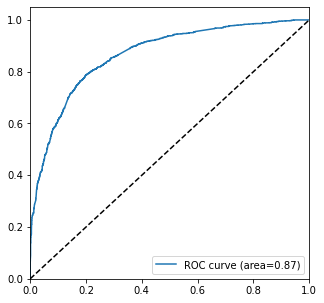

In [102]:
draw_roc(y_train_pred_final.Converted,y_train_pred_final.Conversion_prob)

In [103]:
numbers=[float(x)/10 for x in range(10)]

In [104]:
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conversion_prob.map(lambda x: 1 if x>i else 0)
    

In [105]:
y_train_pred_final.head(10)

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.118909,0,1,1,0,0,0,0,0,0,0,0
1,0,0.417171,0,1,1,1,1,1,0,0,0,0,0
2,0,0.232129,0,1,1,1,0,0,0,0,0,0,0
3,0,0.083669,0,1,0,0,0,0,0,0,0,0,0
4,1,0.605393,1,1,1,1,1,1,1,1,0,0,0
5,0,0.162597,0,1,1,0,0,0,0,0,0,0,0
6,1,0.945164,1,1,1,1,1,1,1,1,1,1,1
7,1,0.865698,1,1,1,1,1,1,1,1,1,1,0
8,0,0.891364,1,1,1,1,1,1,1,1,1,1,0
9,1,0.446262,0,1,1,1,1,1,0,0,0,0,0


In [106]:
cutoff_df=pd.DataFrame(columns=["prob","accuracy","sensi","speci"])

In [107]:
numbers

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [108]:
for i in numbers:
    cm1=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final[i])
    total1=sum(sum(cm1))
    accuracy=(cm1[0,0] + cm1[1,1])/total1
    specificity=(cm1[0,0])/(cm1[0,0]+cm1[0,1])
    sensitivity=(cm1[1,1])/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i]=[i,accuracy,sensitivity,specificity]

In [109]:
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.480834,1.000000,0.000000
0.1,0.1,0.578570,0.985082,0.202073
0.2,0.2,0.708361,0.938928,0.494819
0.3,0.3,0.756781,0.898834,0.625216
0.4,0.4,0.786595,0.812121,0.762953
0.5,0.5,0.791527,0.747319,0.832470
0.6,0.6,0.769334,0.647086,0.882556
0.7,0.7,0.754764,0.578555,0.917962
0.8,0.8,0.709258,0.446620,0.952504
0.9,0.9,0.644923,0.276923,0.985751


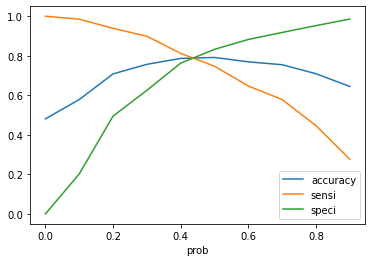

In [110]:
cutoff_df.plot.line(x="prob",y=["accuracy","sensi","speci"])
plt.show()

In [111]:
y_train_pred_final["final_predicted"]=y_train_pred_final["Conversion_prob"].map(lambda x: 1 if x>0.42 else 0)

In [112]:
y_train_pred_final.head()

,Converted,Conversion_prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.118909,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.417171,0,1,1,1,1,1,0,0,0,0,0,0
2,0,0.232129,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.083669,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.605393,1,1,1,1,1,1,1,1,0,0,0,1


In [114]:
metrics.accuracy_score(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

0.7915265635507733

In [116]:
confusion2=metrics.confusion_matrix(y_train_pred_final["Converted"],y_train_pred_final["final_predicted"])

In [154]:
TP=confusion2[1,1]
TN=confusion2[0,0]
FP=confusion2[0,1]
FN=confusion2[1,0]

In [155]:
#snesitivity
TP/(TP + FN)

0.8013986013986014

In [156]:
#specificity
TN/(TN +FP)

0.7823834196891192

In [122]:
X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])


<ipython-input-122-0ccaa15c23a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]=scaler.transform(X_test[['TotalVisits','Total Time Spent on Website', 'Page Views Per Visit']])
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [124]:
len(col)

15

In [125]:
X_test=X_test[col]

In [126]:
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
1077,0.036364,0.145246,1,0,0,0,0,0,0,0,0,0,0,0,0
2079,0.072727,0.151408,1,0,0,0,0,0,0,0,0,0,0,0,0
2325,0.127273,0.019806,0,0,0,0,0,0,0,1,0,0,0,0,0
1132,0.000000,0.000000,0,0,0,0,0,0,1,1,0,0,1,0,0
7181,0.054545,0.578345,0,0,0,0,0,0,0,1,0,0,0,0,0


In [127]:
X_test_sm=sm.add_constant(X_test[col])

In [128]:
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Select,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
1077,1.0,0.036364,0.145246,1,0,0,0,0,0,0,0,0,0,0,0,0
2079,1.0,0.072727,0.151408,1,0,0,0,0,0,0,0,0,0,0,0,0
2325,1.0,0.127273,0.019806,0,0,0,0,0,0,0,1,0,0,0,0,0
1132,1.0,0.000000,0.000000,0,0,0,0,0,0,1,1,0,0,1,0,0
7181,1.0,0.054545,0.578345,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4000,1.0,0.054545,0.333187,1,0,0,0,0,0,0,0,0,0,1,0,0
6543,1.0,0.036364,0.074824,1,0,0,0,0,0,0,0,0,0,0,0,0
1436,1.0,0.072727,0.742958,1,0,0,0,0,0,0,0,0,1,0,0,0
4778,1.0,0.000000,0.000000,0,1,0,0,0,0,0,0,0,1,0,0,0


In [129]:
y_test_pred=res.predict(X_test_sm)

In [130]:
y_test_pred

1077    0.210599
2079    0.229546
2325    0.161383
1132    0.134677
7181    0.638695
          ...   
4000    0.202381
6543    0.164910
1436    0.972140
4778    0.986079
6630    0.170154
Length: 1912, dtype: float64

In [131]:
y_pred_1=pd.DataFrame(y_test_pred)

In [132]:
y_pred_1

,0
1077,0.210599
2079,0.229546
2325,0.161383
1132,0.134677
7181,0.638695
...,...
4000,0.202381
6543,0.164910
1436,0.972140
4778,0.986079


In [133]:
y_test_df=pd.DataFrame(y_test)

In [134]:
y_pred_1.reset_index(drop=True,inplace=True)

In [136]:
y_test_df.reset_index(drop=True,inplace=True)

In [139]:
y_pred_1

,0
0,0.210599
1,0.229546
2,0.161383
3,0.134677
4,0.638695
...,...
1907,0.202381
1908,0.164910
1909,0.972140
1910,0.986079


In [138]:
y_test_df

,Converted
0,1
1,1
2,0
3,1
4,0
...,...
1907,0
1908,0
1909,1
1910,0


In [143]:
y_pred_final=pd.concat([y_pred_1,y_test_df],axis=1)

In [144]:
y_pred_final.head(7)

,0,Converted
0,0.210599,1
1,0.229546,1
2,0.161383,0
3,0.134677,1
4,0.638695,0
5,0.932031,1
6,0.037661,0


In [146]:
y_pred_final=y_pred_final.rename(columns={0:"Conversion_Prob"})

In [147]:
y_pred_final.head(7)

,Conversion_Prob,Converted
0,0.210599,1
1,0.229546,1
2,0.161383,0
3,0.134677,1
4,0.638695,0
5,0.932031,1
6,0.037661,0


In [148]:
y_pred_final["final_predicted"]=y_pred_final["Conversion_Prob"].map(lambda x: 1 if x>0.42 else 0)

In [149]:
y_pred_final

,Conversion_Prob,Converted,final_predicted
0,0.210599,1,0
1,0.229546,1,0
2,0.161383,0,0
3,0.134677,1,0
4,0.638695,0,1
...,...,...,...
1907,0.202381,0,0
1908,0.164910,0,0
1909,0.972140,1,1
1910,0.986079,0,1


In [151]:
metrics.accuracy_score(y_pred_final["Converted"],y_pred_final["final_predicted"])

0.8028242677824268

In [157]:
confusion3=metrics.confusion_matrix(y_pred_final["Converted"],y_pred_final["final_predicted"])

In [158]:
TP=confusion3[1,1]
TN=confusion3[0,0]
FP=confusion3[0,1]
FN=confusion3[1,0]

In [159]:
#speci
TN/(TN+FP)

0.7973790322580645

In [160]:
#sensi
TP/(TP +FN)

0.808695652173913